In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("data/dataset_schema_v1.csv")

print(df.shape)
df.head()


(420, 8)


,url_length,dot_count,hyphen_count,has_https,has_ip,suspicious_keyword_count,entropy,label
0,103,1,0,1,0,0,5.43,1
1,61,2,1,0,0,0,4.65,1
2,36,2,1,1,0,0,4.09,1
3,40,3,1,1,0,0,4.16,1
4,35,2,1,0,0,0,4.07,1


In [3]:
X = df.drop("label", axis=1)
y = df["label"]

print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (420, 7)
Label shape: (420,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (336, 7)
X_test: (84, 7)
y_train: (336,)
y_test: (84,)


In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


Accuracy: 0.9404761904761905
Precision: 0.9375
Recall: 0.9574468085106383
F1: 0.9473684210526315


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.94      0.96      0.95        47

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



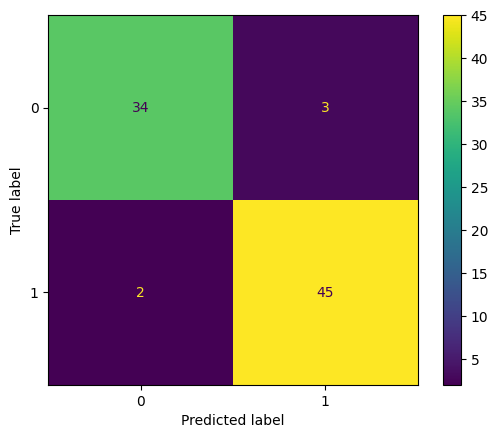

In [8]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [9]:
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")


url_length: 0.46024432857956166
dot_count: 0.33230288965359106
hyphen_count: 1.7663166668666086
has_https: -3.0559526761255746
has_ip: 0.02608145020128304
suspicious_keyword_count: 0.9941033445595383
entropy: -0.8116340407430626


In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())


Cross-validation scores: [0.98809524 0.98809524 0.92857143 0.92857143 0.88095238]
Average CV accuracy: 0.9428571428571431


In [11]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


In [12]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1:", rf_f1)

Random Forest Metrics:
Accuracy: 0.9642857142857143
Precision: 0.9583333333333334
Recall: 0.9787234042553191
F1: 0.968421052631579
